<a href="https://colab.research.google.com/github/sasaxton15/Sax-Brainstoming-Project-/blob/master/Copy_of_COVID_19_Tracker(Positive_cases_by_US_states).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

## Importing the libraries

In [46]:
import pandas as pd 
import matplotlib.pyplot as plt  
import numpy as np
import matplotlib.ticker as ticker 
from matplotlib.dates import DateFormatter 
import datetime as dt 

## Importing the dataset

In [47]:
df = pd.read_json('https://covidtracking.com/api/states/daily', ) 



In [48]:
print (df)

          date state  positive  ...  positiveScore  score  grade
0     20200714    AK    1579.0  ...              0      0       
1     20200714    AL   57255.0  ...              0      0       
2     20200714    AR   29733.0  ...              0      0       
3     20200714    AS       0.0  ...              0      0       
4     20200714    AZ  128097.0  ...              0      0       
...        ...   ...       ...  ...            ...    ...    ...
7348  20200126    WA       2.0  ...              0      0       
7349  20200125    WA       2.0  ...              0      0       
7350  20200124    WA       2.0  ...              0      0       
7351  20200123    WA       2.0  ...              0      0       
7352  20200122    WA       2.0  ...              0      0       

[7353 rows x 41 columns]


In [49]:
print (df.columns)

Index(['date', 'state', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'dataQualityGrade', 'lastUpdateEt', 'dateModified',
       'checkTimeEt', 'death', 'hospitalized', 'dateChecked',
       'totalTestsViral', 'positiveTestsViral', 'negativeTestsViral',
       'positiveCasesViral', 'deathConfirmed', 'deathProbable', 'fips',
       'positiveIncrease', 'negativeIncrease', 'total', 'totalTestResults',
       'totalTestResultsIncrease', 'posNeg', 'deathIncrease',
       'hospitalizedIncrease', 'hash', 'commercialScore',
       'negativeRegularScore', 'negativeScore', 'positiveScore', 'score',
       'grade'],
      dtype='object')


#Restructing dataset that you want to see 

In [50]:
states = ['TX', 'CA', 'NY', 'AZ', 'FL']
df = df[df['state'].isin(states)] 




In [51]:
print (df)

          date state  positive  ...  positiveScore  score  grade
4     20200714    AZ  128097.0  ...              0      0       
5     20200714    CA  336508.0  ...              0      0       
10    20200714    FL  291629.0  ...              0      0       
37    20200714    NY  403175.0  ...              0      0       
47    20200714    TX  275058.0  ...              0      0       
...        ...   ...       ...  ...            ...    ...    ...
7290  20200304    AZ       2.0  ...              0      0       
7291  20200304    CA      53.0  ...              0      0       
7292  20200304    FL       2.0  ...              0      0       
7298  20200304    NY       6.0  ...              0      0       
7302  20200304    TX       1.0  ...              0      0       

[665 rows x 41 columns]


In [52]:
df['Cases'] = df[['positive']].sum(axis=1)

In [53]:
df = df.pivot(index= 'date', columns='state', values='Cases')  
states = list(df.columns)
covid = df.reset_index('date')
covid.set_index(['date'],inplace=True)
covid.columns = states


In [54]:
print (df)

state           AZ        CA        FL        NY        TX
date                                                      
20200304       2.0      53.0       2.0       6.0       1.0
20200305       2.0      53.0       9.0      22.0       1.0
20200306       3.0      60.0       9.0      33.0       5.0
20200307       5.0      69.0      14.0      76.0       8.0
20200308       5.0      88.0      17.0     105.0       8.0
...            ...       ...       ...       ...       ...
20200710  116892.0  304297.0  244151.0  400299.0  240111.0
20200711  119930.0  312344.0  254511.0  401029.0  250462.0
20200712  122467.0  320804.0  269811.0  401706.0  258658.0
20200713  123824.0  329162.0  282435.0  402263.0  264313.0
20200714  128097.0  336508.0  291629.0  403175.0  275058.0

[133 rows x 5 columns]


# Section 2 - Loading and Selecting Data

In [55]:
print(covid)

                AZ        CA        FL        NY        TX
date                                                      
20200304       2.0      53.0       2.0       6.0       1.0
20200305       2.0      53.0       9.0      22.0       1.0
20200306       3.0      60.0       9.0      33.0       5.0
20200307       5.0      69.0      14.0      76.0       8.0
20200308       5.0      88.0      17.0     105.0       8.0
...            ...       ...       ...       ...       ...
20200710  116892.0  304297.0  244151.0  400299.0  240111.0
20200711  119930.0  312344.0  254511.0  401029.0  250462.0
20200712  122467.0  320804.0  269811.0  401706.0  258658.0
20200713  123824.0  329162.0  282435.0  402263.0  264313.0
20200714  128097.0  336508.0  291629.0  403175.0  275058.0

[133 rows x 5 columns]


#Section 3 creating summary tab

# Section 4 - Restructuring our Data

# Section 5 - Calculating Rates per 100,000

# Section 6 - Generating Colours and Style

In [56]:
colors = {'AZ':'#045275', 'CA':'#089099', 'FL':'#7CCBA2', 'NY':'#7C1D6F', 'TX':'#DC3977'}
plt.style.use('fivethirtyeight') 



# Section 7 - Creating the Visualization(Positive Cases)

Text(20200714, -100000, 'Source: https://covidtracking.com/api/states/daily')

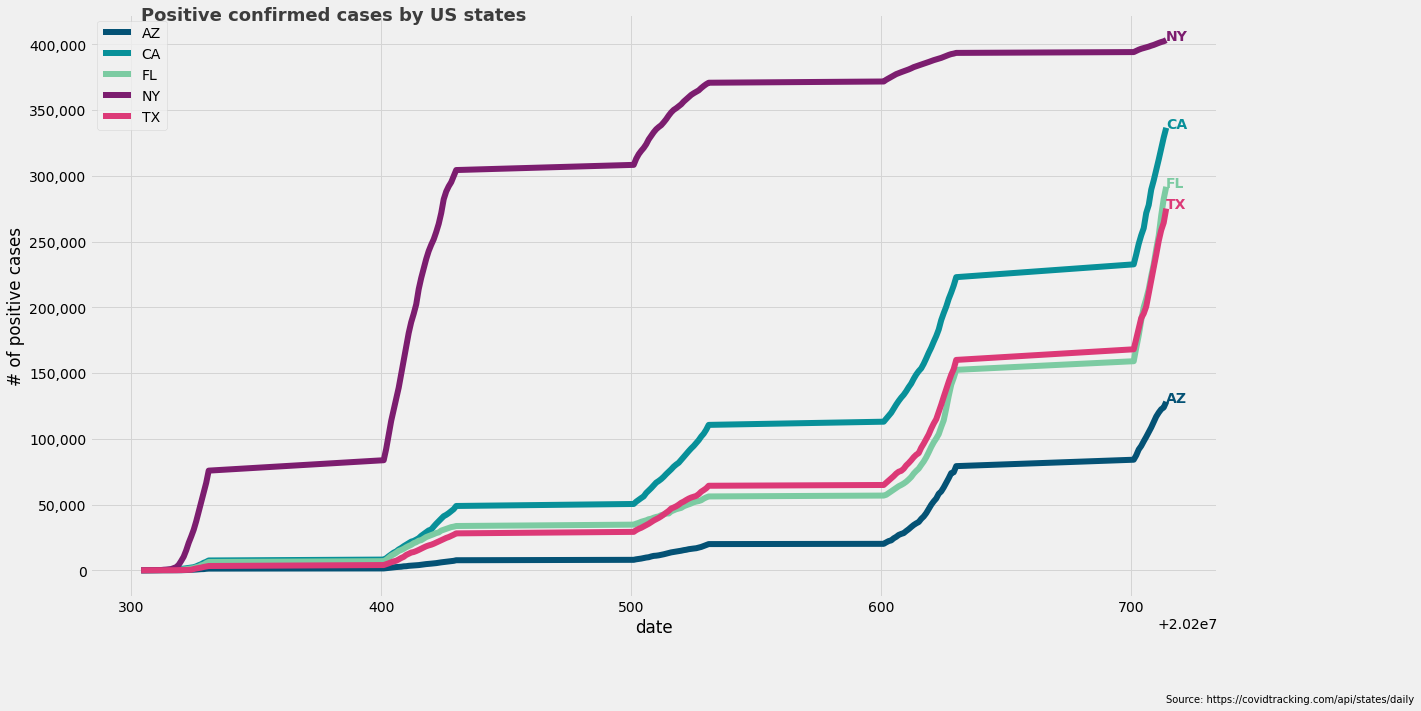

In [71]:
plot = covid.plot(figsize=(18,10), color=list(colors.values()), linewidth=6, legend=True)
 
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('date')
plot.set_ylabel('# of positive cases') 
 
  
for state in list(colors.keys()):  
    plot.text(x = covid.index[-1], y = covid[state].max(), color = colors[state], s = state, weight = 'bold')  
plot.text(x = covid.index[0], y = int(covid.max().max())+15000,                s = "Positive confirmed cases by US states", fontsize = 18, weight = 'bold', alpha = .75)
plot.text(x = covid.index[-1], y = -100000, s = 'Source: https://covidtracking.com/api/states/daily',  fontsize = 10)

# Section 8 - Creating Visualizations of Positive Cases by US States 


Text(20200714, -100000, 'Source: https://covidtracking.com/api/states/daily')

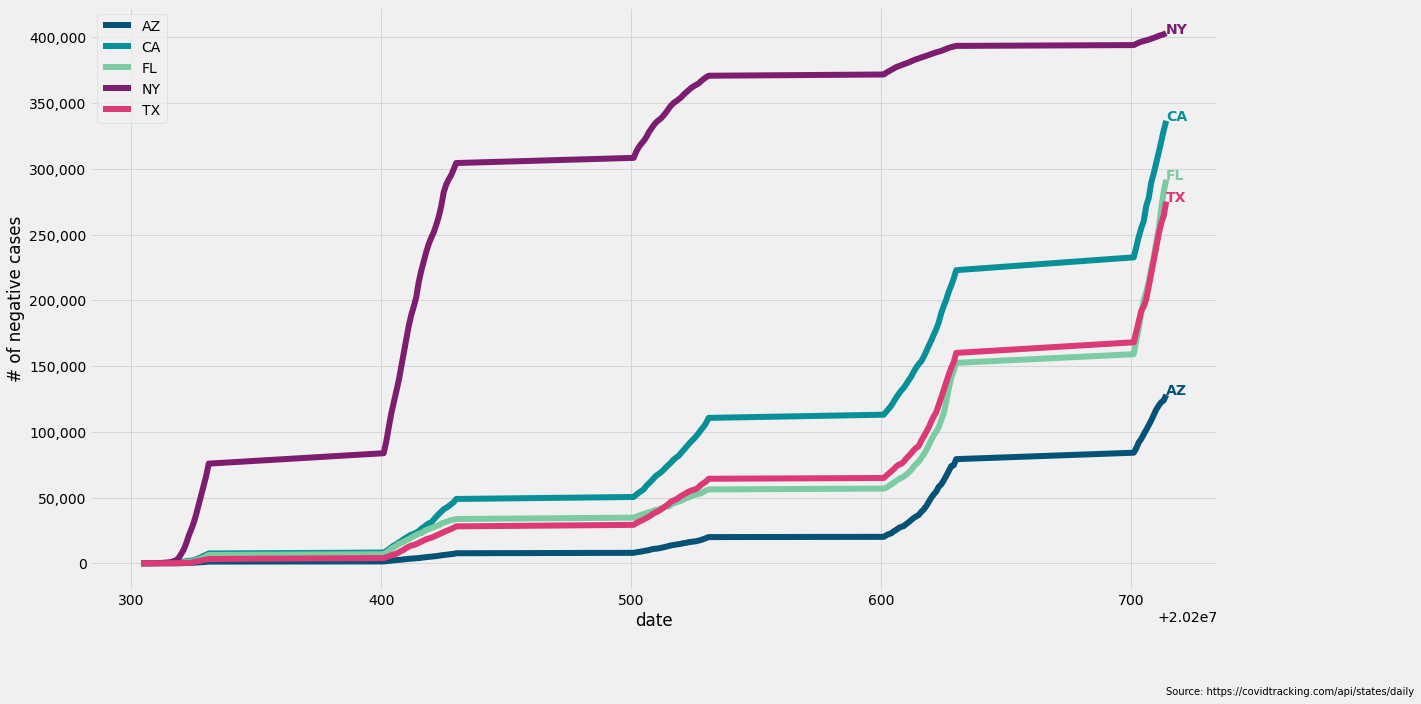

In [58]:
plot = covid.plot(figsize=(18,10), color=list(colors.values()), linewidth=6, legend=True)
 
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('date')
plot.set_ylabel('# of negative cases') 
 
  
for state in list(colors.keys()):  
    plot.text(x = covid.index[-1], y = covid[state].max(), color = colors[state], s = state, weight = 'bold') 
plot.text(x = covid.index[-1], y = -100000, s = 'Source: https://covidtracking.com/api/states/daily',  fontsize = 10)

# Section 9 - Adding Labels 

#Forecasting the US Coronavirus 